In [76]:
from functools import partial
from geopy.geocoders import Nominatim
from datetime import timedelta, datetime

import random, pandas as pd
import matplotlib.pyplot as plt

In [2]:
geolocator = Nominatim(user_agent="a2")
geocode = partial(geolocator.geocode, language="ru")

In [26]:
df = pd.read_excel('dataset_streets.xlsx')
df = df['Adress'].values.tolist()
out = list()
for elem in df:
    kek = geocode(elem)
    if kek is not None:
        out.append([elem, kek[1][0], kek[1][1]])
out = pd.DataFrame(out, columns=['adress','latitude','longtitude'])
out.to_excel('dataset_streets_final.xlsx',index = False)

In [66]:
weekrandom = [(80,120),(60,90),(55,80),(55,85),(65,100),(45,70),(45,70)]
rapid = [0,0,0,0,0,0,0,0,0,0,0,1,1]
order_type = [0,0,0,1,1,1,2,2,3,3,4]

orders = list()
list_adress = out.values.tolist()
list_adress_from = random.sample(out.values.tolist(),25)
for i,_ in enumerate(list_adress_from):
    list_adress_from[i].append(random.choice(order_type))
startdate = datetime.now() - timedelta(days=90)
for i_date in range(61):
    curdate = startdate + timedelta(days=i_date)
    maxorders = random.randint(weekrandom[datetime.weekday(curdate)][0],weekrandom[datetime.weekday(curdate)][1])
    for i_orders in range(maxorders+1):
        kek = random.choice(list_adress_from)
        while True:
            lol = random.choice(list_adress)
            if kek != lol:
                break
        orders.append([curdate,\
                       kek[0],kek[1],kek[2],\
                       lol[0],lol[1],lol[2],\
                       random.choice(rapid),kek[3],random.randint(300,5000),random.randint(0,1)
                      ])
        if orders[-1][8] == 0:
            orders[-1][7] = 1
orders = pd.DataFrame(orders,columns=['date',\
                                      'adress from','latitude from','longtitude from',\
                                      'adress to','latitude to','longtitude to',\
                                      'rapid','order_type','cost','cashed'
                                     ])
orders.to_excel('dataset_orders_final.xlsx',index = False)

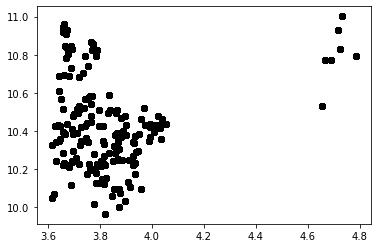

In [102]:
orders = pd.read_excel('dataset_orders_final_new.xlsx')

clust_orders = orders[['latitude to','longtitude to','rapid']].copy()
clust_orders = clust_orders[clust_orders['rapid'] == 0]
clust_orders = clust_orders.drop(['rapid'], axis=1).reset_index(drop=True)
clust_orders['latitude to'] = (clust_orders['latitude to'] - 55)*10
clust_orders['longtitude to'] = (clust_orders['longtitude to'] - 38)*10

# clust_orders
plt.plot(clust_orders['latitude to'].values, clust_orders['longtitude to'].values, 'o', color='black');